In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

#### 1. Вывести: кол-во наблюдений в датасете

In [13]:
len(df)

4622

#### 2. Вывести названия столбцов

In [14]:
print(*df.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


#### 3. Определить самую частую позицию (item) в заказе

In [15]:
print(*df.item_name.mode()) # or for each order?

Chicken Bowl


#### 4. Построить гистрограмму частоты заказов по позициям (item)

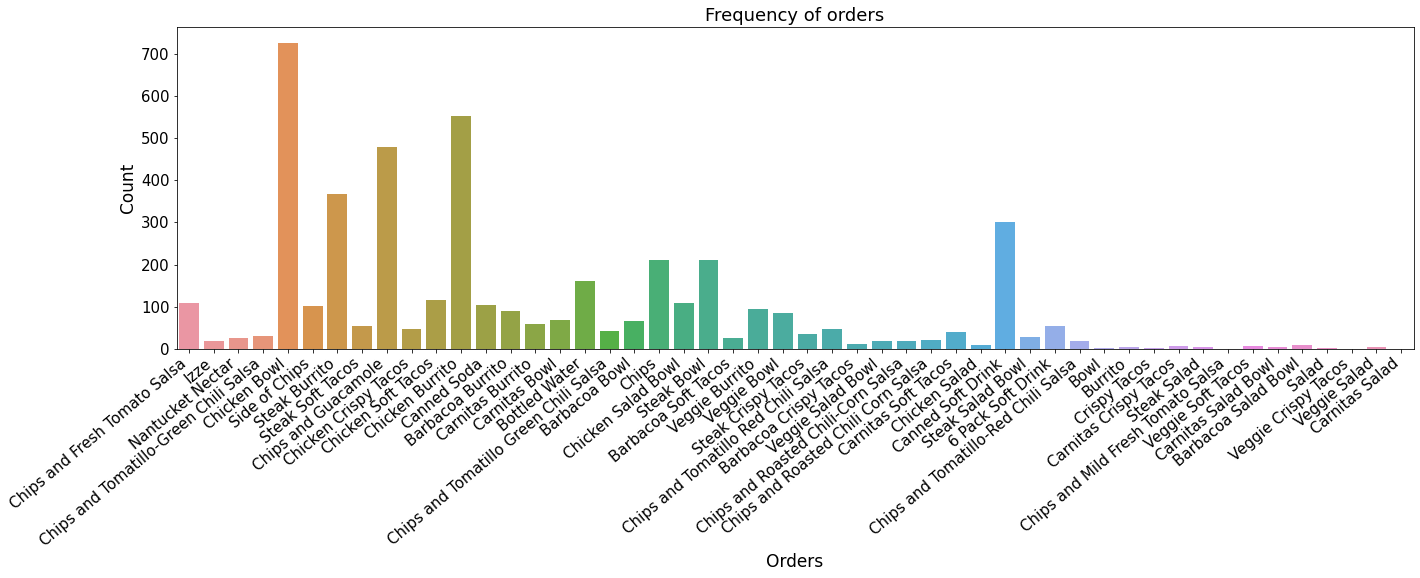

In [16]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
ax = sns.countplot(x="item_name", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel="Orders", ylabel = "Count")
ax.yaxis.label.set_size(17)
ax.xaxis.label.set_size(17)
plt.tight_layout()
plt.title('Frequency of orders')
plt.show()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [17]:
if df.dtypes['item_price'] == 'object':
    df['item_price'] = df['item_price'].apply(lambda row: float(row[1:]))

#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

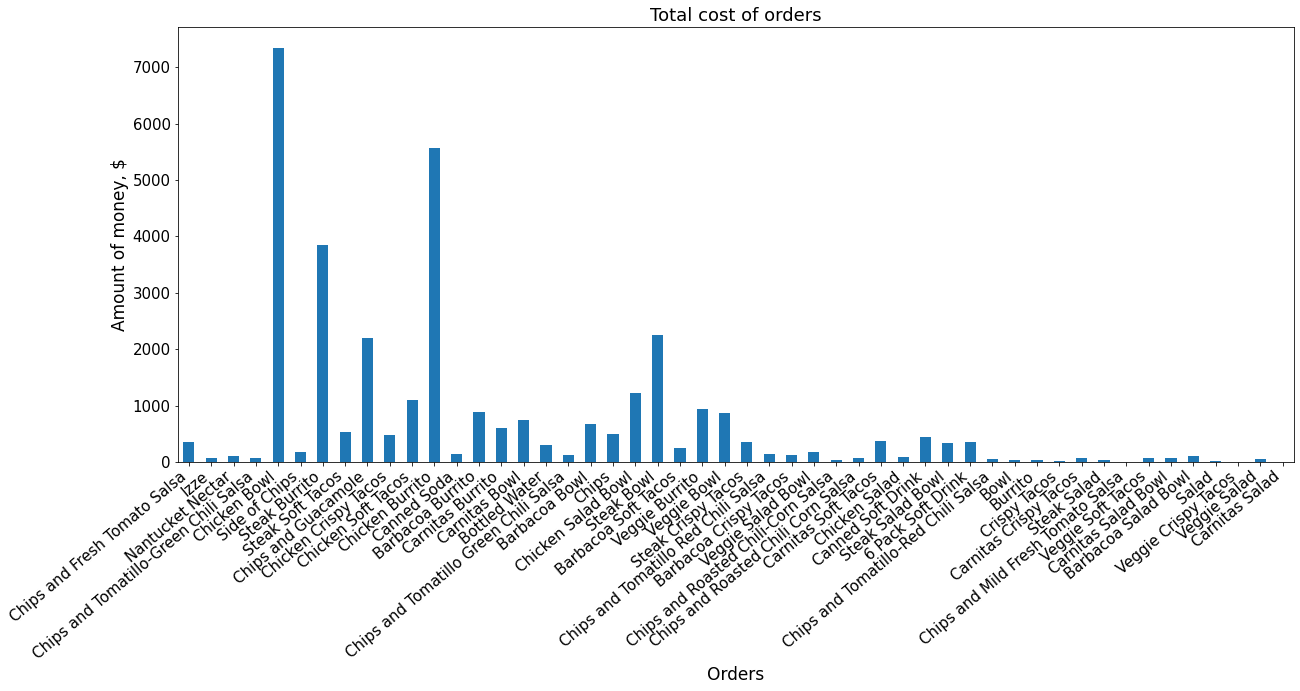

pandas.core.frame.DataFrame

In [97]:
group = df.groupby('item_name', sort=False).item_price.agg(np.sum)
ax = group.plot(y="item_price", kind="bar", legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel="Orders", ylabel = "Amount of money, $")
ax.yaxis.label.set_size(17)
ax.xaxis.label.set_size(17)
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
plt.title('Total cost of orders')
plt.show()

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [19]:
#first way
print(*group.sum() / len(df))
#second way
print(df['item_price'].mean())
#third way
print(df.describe().loc['mean']['item_price'])

7.464335785374297
7.464335785374297
7.464335785374297


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [20]:
df.agg({
    "quantity": ["mean", "min", "max", "median"],
    "item_price": ["mean", "min", "max", "median"]
})

,quantity,item_price
mean,1.075725,7.464336
min,1.000000,1.090000
max,15.000000,44.250000
median,1.000000,8.750000


#### 9. Определить статистику заказов стейков,

In [53]:
steaks = df[df.item_name.str.contains("Steak")]
steaks[["quantity", "item_price"]].describe()

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


#### а также статистику заказов прожарки.

In [54]:
df[df.choice_description.str.contains("Mild|Mmedium|Hot", na=False)][["quantity", "item_price"]].describe()

,quantity,item_price
count,580.000000,580.000000
mean,1.062069,9.854534
std,0.248538,2.706092
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [55]:
df['item_price_rubles'] = round(df.item_price * 71.56, 2)
df.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,171.03
1,1,1,Izze,[Clementine],3.39,242.59
2,1,1,Nantucket Nectar,[Apple],3.39,242.59
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,171.03
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1215.09


#### 11. Сгруппировать заказы по входящим позициям в него.

In [104]:
lambda x: np.sum
group1 = df.groupby('order_id', sort=False).aggregate({'item_name': np.sum, 'item_price': np.sum, 'item_price_rubles': np.sum})
group1
df.order_id.value_counts()

926     23
1483    14
205     12
759     11
1786    11
        ..
768      1
341      1
1048     1
94       1
1199     1
Name: order_id, Length: 1834, dtype: int64

### Отдельно сгруппировать по стейкам во всех видах прожарках.

In [89]:
group2 = steaks.groupby('item_name', sort=False).agg({'quantity': np.sum, 'item_price': np.sum, 'item_price_rubles': np.sum})
group2

,quantity,item_price,item_price_rubles
item_name,,,
Steak Burrito,386,3851.43,275607.88
Steak Soft Tacos,56,536.05,38359.68
Steak Bowl,221,2260.19,161739.01
Steak Crispy Tacos,36,357.34,25571.22
Steak Salad Bowl,31,343.59,24587.35
Steak Salad,4,35.66,2551.82


#### 12. Определить цену по каждой позиции в отдельности.

In [94]:
new_df = pd.DataFrame(columns=["item_name", "item_price", "item_price_rubles"])
пк
new_df["item_name"] = group2.unique(self)
new_df["item_price"] = df["item_price"] / df["quantity"]
new_df["item_price_rubles"] = df["item_price_rubles"] / df["quantity"]
new_df

KeyError: 'item_name'

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.